# Poems Preprocessing

In [302]:
import pandas as pd
import seaborn as sns

In [309]:
poems = pd.read_csv("../corpora/german_poems.csv")

In [304]:
poems.shape

(59081, 7)

In [115]:
poems.sample(3)

,pid,filename,poet,title,year,poem,poemlength
4409,66338,"Brentano, Clemens_UNTITLED_1806","Brentano, Clemens",UNTITLED,1806,b'Als die Preu&#383;&#383;en mar&#383;chirten ...,180
10543,21443,"Eichrodt, Ludwig_UNTITLED_1859","Eichrodt, Ludwig",UNTITLED,1859,Ich weile so gern in der klaren Nacht Wenn am ...,49
29555,48370,"Grillparzer, Franz_Deutsche Ästhetik_1831","Grillparzer, Franz",Deutsche Ästhetik,1831,"Ihr teilt euern Garten streng in Beete, Seht z...",32


## Shrink and edit corpus

### Only poems of the early modern (= Frühe Moderne) according to Klaus Wieland

Demarcation: https://journals.openedition.org/rg/976#ftn10

In [116]:
poems = poems[poems.year >= 1880]

In [117]:
poems.shape

(7842, 7)

In [301]:
poems.poet.value_counts()

Tucholsky, Kurt                  668
Dauthendey, Max                  648
Holz, Arno                       514
Morgenstern, Christian           504
Bierbaum, Otto Julius            469
Löns, Hermann                    438
Henckell, Karl                   430
Rilke, Rainer Maria              362
Klabund                          346
Dehmel, Richard Fedor Leopold    307
Ringelnatz, Joachim              300
Müller-Jahnke, Clara             225
Thoma, Ludwig                    215
Falke, Gustav                    188
Hartleben, Otto Erich            182
Trakl, Georg                     150
Hofmannsthal, Hugo von           150
Meyer, Conrad Ferdinand          149
Flaischlen, Cäsar                135
Heym, Georg                      129
Wille, Bruno                     122
Wedekind, Frank                  122
Stadler, Ernst                   120
George, Stefan                   114
Lichtenstein, Alfred             101
Weissmann, Maria Luise            97
Liliencron, Detlev von            96
L

In [257]:
a = poems[poems.year == 1892]
#b = a[a.poet == "Dauthendey, Max"]

In [259]:
sum(a.poet.value_counts())

1322

In [261]:
648+504

1152

In [262]:
1152/1322

0.8714069591527988

In [260]:
a.poet.value_counts()

Dauthendey, Max           648
Morgenstern, Christian    504
Flaischlen, Cäsar         135
George, Stefan             20
Hofmannsthal, Hugo von     13
Hartleben, Otto Erich       1
Dahn, Felix                 1
Name: poet, dtype: int64

### Literary Trends classification according to Klaus Wieland

Classification: https://journals.openedition.org/rg/976#ftn10

In [188]:
literary_trends = {"Naturalismus": list(range(1880, 1892)),
                   "Jahrhundertwende" : list(range(1892, 1910)),
                   "Expressionismus_Dadaismus": list(range(1910, 1925)),
                   "Neue Sachlichkeit": list(range(1925, 1933))}

In [189]:
def get_epoch(year):
    epoch = ""
    for k, v in literary_trends.items():
        if year in v:
            epoch = k
            break
    return epoch

In [190]:
npoems = poems.copy()
npoems["epoch"] = npoems.apply(lambda row: get_epoch(row.year), axis=1)

In [191]:
npoems.sample(3)

,pid,filename,poet,title,year,poem,poemlength,epoch
25347,21051,"Stadler, Ernst_UNTITLED_1898","Stadler, Ernst",UNTITLED,1898,Der lange Tag erlosch im gelben Leuchten des M...,115,Jahrhundertwende
22863,68638,"George, Stefan_UNTITLED_1897","George, Stefan",UNTITLED,1897,b'Mir ist als ob ein blick im dunkel glimme &#...,145,Jahrhundertwende
29586,70395,"Holz, Arno_UNTITLED_1886","Holz, Arno",UNTITLED,1886,Wer ſchwärmte früher für Laſſalle? Heut gellt ...,76,Naturalismus


## Text cleaning

### Replace html entities with characters

In [192]:
from html import unescape

In [193]:
npoems.sample(3)

,pid,filename,poet,title,year,poem,poemlength,epoch
19002,36720,"Holz, Arno_Ein dunkles Blatt_1896","Holz, Arno",Ein dunkles Blatt,1896,"Lisch aus, du Gluth auf meinem Herd! In Nacht ...",64,Jahrhundertwende
31416,39005,"Sack, Gustav_UNTITLED_1900","Sack, Gustav",UNTITLED,1900,Sie hielt mich fest an ihren gelben Haaren ein...,80,Jahrhundertwende
50290,28858,"Hartleben, Otto Erich_UNTITLED_1884","Hartleben, Otto Erich",UNTITLED,1884,"Auf den treulos rollenden Rädern, nach des Süd...",76,Naturalismus


In [194]:
npoems["poem"] = npoems.poem.apply(unescape)

### Remove remaining notation of bytes " b' ... ' " inside poems

In [195]:
import re

def remove_b(s):
    regex = re.compile("b'(.*?)'")
    return re.sub(regex, r"\1", s)

In [196]:
npoems["poem"] = npoems["poem"].apply(remove_b)

In [197]:
npoems.sample(3)

,pid,filename,poet,title,year,poem,poemlength,epoch
13019,10978,"Tucholsky, Kurt_Gesicht_1912","Tucholsky, Kurt",Gesicht,1912,"Für George Grosz, der uns diese sehen lehrte",9,Expressionismus_Dadaismus
18560,41326,"Trakl, Georg_Im Winter_1900","Trakl, Georg",Im Winter,1900,Der Acker leuchtet weiß und kalt. Der Himmel i...,79,Jahrhundertwende
47082,28933,"Scheerbart, Paul_UNTITLED_1889","Scheerbart, Paul",UNTITLED,1889,Für den ersten Welterlöser Muß ich mich natürl...,23,Naturalismus


## Orthography correction

In [198]:
orthography_correction = {"ſ": "s", "uͤ": "ue", "aͤ": "ae", "oͤ": "oe"}

In [199]:
nnpoems = npoems.copy()
for k, v in orthography_correction.items():
    nnpoems["poem"] = nnpoems["poem"].str.replace(k, v)

## Save csv with current date

In [200]:
import datetime as dt

today = dt.datetime.today().strftime('(%d_%m_%y)')  
today = ""
output_file = '../corpora/german_modern_poems{}.csv'.format(today)
nnpoems.to_csv(output_file, index=False)

## Plot distribution

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

In [202]:
modernpoems = pd.read_csv("../corpora/german_modern_poems.csv")

In [203]:
modernpoems.sample(3)

,pid,filename,poet,title,year,poem,poemlength,epoch
437,68683,"George, Stefan_UNTITLED_1897","George, Stefan",UNTITLED,1897,Du sanfter seher der du hilflos starrest In t...,98,Jahrhundertwende
193,29354,"Dauthendey, Max_[Unsere Augen so leer]_1892","Dauthendey, Max",[Unsere Augen so leer],1892,"Unsere Augen so leer, Unsere Küsse so welk, Wi...",41,Jahrhundertwende
6031,35867,"Bierbaum, Otto Julius_Frau Güte_1887","Bierbaum, Otto Julius",Frau Güte,1887,Heut sagte ich die ganze Nacht Im Traum: Ich w...,84,Naturalismus


In [204]:
modernpoems.shape

(7842, 8)

In [205]:
#modernpoems = modernpoems[modernpoems.year != 1892]

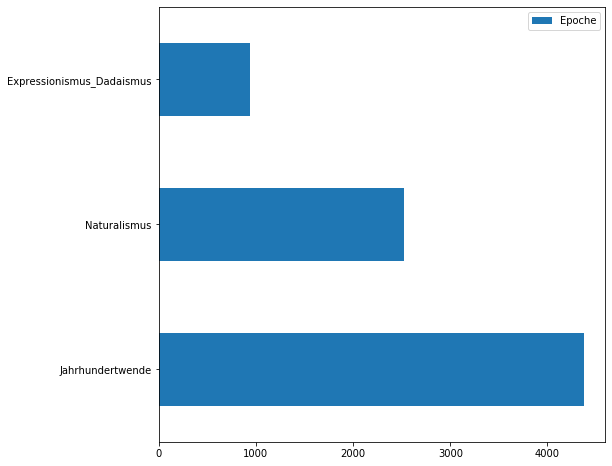

In [206]:
modernpoems.epoch.value_counts().plot(kind="barh",
                                      figsize=(8, 8),
                                      label="Epoche")
plt.legend()
plt.show()

### Plot year distribution and poem count for the year 1892

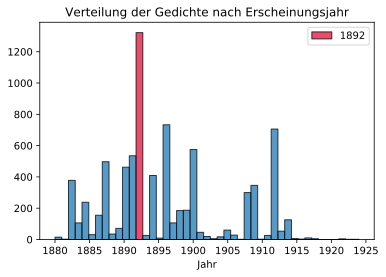

In [256]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
ax = sns.distplot(modernpoems.year,
                        kde=False, 
                        rug=False, 
                        bins=45, 
                        hist_kws=dict(edgecolor="black", linewidth=1, alpha=0.75),
                        axlabel="Jahr")
ax.set_xticks(list(range(1880, 1930, 5)))
highest = sorted([p.get_height() for p in ax.patches])[-1]
for p in ax.patches:
    if p.get_height() >= highest:
        p.set_color("crimson")
        p.set_edgecolor("black")
        p.set_label("1892")
ax.set_label("Erscheinungsjahre")
plt.title("Verteilung der Gedichte nach Erscheinungsjahr")
plt.legend()
plt.savefig("../utils/img/publicationyear_distribution.png", dpi=300)
plt.show()

In [264]:
peak = modernpoems[modernpoems.year == 1892]

In [291]:
from pandas.plotting import table 

In [289]:
peak_df = pd.DataFrame(peak.poet.value_counts()).rename_axis("Dichter").reset_index()
peak_df.columns = ["Dichter", "Gedichtsanzahl"]

In [290]:
peak_df

,Dichter,Gedichtsanzahl
0,"Dauthendey, Max",648
1,"Morgenstern, Christian",504
2,"Flaischlen, Cäsar",135
3,"George, Stefan",20
4,"Hofmannsthal, Hugo von",13
5,"Hartleben, Otto Erich",1
6,"Dahn, Felix",1


In [297]:
from collections import defaultdict
from datetime import datetime
import glob
import io
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from typing import Dict, List, Optional, Tuple, Union
def df_to_latex(df, alignment="c"):
    """ Convert a pandas dataframe to a LaTeX tabular.
        Prints labels in bold, does not use math mode.
        Adapted from: https://techoverflow.net/2013/12/08/converting-a-pandas-dataframe-to-a-customized-latex-tabular/.
    """

    numColumns = df.shape[1]
    numRows = df.shape[0]
    output = io.StringIO()
    colFormat = ("%s|%s" % (alignment, alignment * numColumns))
    #Write header
    output.write("\\small\n")
    output.write("\\begin{tabular}{%s}\n" % colFormat)
    output.write("\\hline\n")
    columnLabels = ["\\textbf{%s}" % label for label in df.columns]
    output.write("& %s\\\\\\hline\n" % " & ".join(columnLabels))
    #Write data lines
    for i in range(numRows):
        output.write("\\textbf{%s} & %s\\\\\n"
                     % (df.index[i], " & ".join([str(val) for val in df.iloc[i]])))

    #Write footer
    output.write("\\end{tabular}")
    return output.getvalue()

In [300]:
print(df_to_latex(peak_df))

\small
\begin{tabular}{c|cc}
\hline
& \textbf{Dichter} & \textbf{Gedichtsanzahl}\\\hline
\textbf{0} & Dauthendey, Max & 648\\
\textbf{1} & Morgenstern, Christian & 504\\
\textbf{2} & Flaischlen, Cäsar & 135\\
\textbf{3} & George, Stefan & 20\\
\textbf{4} & Hofmannsthal, Hugo von & 13\\
\textbf{5} & Hartleben, Otto Erich & 1\\
\textbf{6} & Dahn, Felix & 1\\
\end{tabular}


## different epoch classification

according to: NDB und Wieland

In [1]:
import pandas as pd

In [2]:
modernpoems = pd.read_csv("../corpora/german_modern_poems.csv")

In [3]:
modernpoems.poet.value_counts()

Tucholsky, Kurt                  668
Dauthendey, Max                  648
Holz, Arno                       514
Morgenstern, Christian           504
Bierbaum, Otto Julius            469
Löns, Hermann                    438
Henckell, Karl                   430
Rilke, Rainer Maria              362
Klabund                          346
Dehmel, Richard Fedor Leopold    307
Ringelnatz, Joachim              300
Müller-Jahnke, Clara             225
Thoma, Ludwig                    215
Falke, Gustav                    188
Hartleben, Otto Erich            182
Hofmannsthal, Hugo von           150
Trakl, Georg                     150
Meyer, Conrad Ferdinand          149
Flaischlen, Cäsar                135
Heym, Georg                      129
Wedekind, Frank                  122
Wille, Bruno                     122
Stadler, Ernst                   120
George, Stefan                   114
Lichtenstein, Alfred             101
Weissmann, Maria Luise            97
Liliencron, Detlev von            96
L

In [23]:
b = modernpoems[modernpoems.poet == "Hofmannsthal, Hugo von"] #aktuell
#b.year.value_counts()
b.epoch.value_counts()

Jahrhundertwende             115
Naturalismus                  31
Expressionismus_Dadaismus      4
Name: epoch, dtype: int64

In [ ]:
naturalismus = ["Holz, Arno",
               "Löns, Hermann",
               "Henckell, Karl",
               "Müller-Jahnke, Clara",
               "Hartleben, Otto Erich"]
jahrhundertwende = ["Dauthendey, Max", 
                    "Morgenstern, Christian", 
                    "Bierbaum, Otto Julius",
                    "Rilke, Rainer Maria",
                    "Dehmel, Richard Fedor Leopold",
                    "Ringelnatz, Joachim",
                    "Thoma, Ludwig",
                    "Falke, Gustav",
                    "Hofmannsthal, Hugo von"]
expressionismus_dadaismus = ["Klabund"]
neue_sachlichkeit = ["Tucholsky, Kurt"]

new_literary_trends = {"Naturalismus": naturalismus,
                       "Jahrhundertwende": jahrhundertwende,
                       "Expressionismus_Dadaismus": expressionismus_dadaismus,
                       "Neue Sachlichkeit": neue_sachlichkeit}